In [1]:
#importing neccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading datasets
train = pd.read_csv('C:/Users/Mohan/Desktop/ICT/Exit Exam/dataset/train.csv')
test = pd.read_csv('C:/Users/Mohan/Desktop/ICT/Exit Exam/dataset/test.csv')
ss = pd.read_csv('C:/Users/Mohan/Desktop/ICT/Exit Exam/dataset/sample_submission.csv')

In [3]:
# no.of data points and features
train.shape, test.shape, ss.shape

((15681, 18), (3921, 17), (5, 2))

In [4]:
train.head()

,instance_id,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,voice_gender,mode,speechiness,tempo,musician_category,valence,music_genre
0,MSC_83537.0,Estrellitas y Duendes,49.178,0.970522,0.580508,214625.776,0.192107,0.000000,Scale E,0.147134,-14.140,NaN,Major,0.046404,143.78799999999998,Band,0.598965,Jazz
1,MSC_22044.0,Al Norte,59.827,1.009380,0.687542,216232.195,0.265942,0.000031,Scale A,0.174655,-13.716,Male,?,0.039949,?,Band,0.357194,Jazz
2,MSC_62017.0,Yeah! (feat. Lil Jon & Ludacris),89.023,0.020041,0.967948,273314.723,0.857411,0.000000,Scale D,0.042030,-4.995,Female,Major,0.119917,105.01799999999999,Band,0.635525,Rap
3,MSC_76365.0,Can’t You See,55.762,0.010284,0.616287,189189.605,0.970513,0.000220,Scale D,0.124637,-4.262,Both,Major,0.167493,?,Duet,0.983750,Rock
4,MSC_71493.0,"Sonata III (G Moll), BWV 1029: Adagio",45.095,0.858769,0.280645,410136.987,0.114732,0.002753,Scale F Sharp,0.134782,-26.922,Female,Minor,0.039139,112.18299999999999,Band,0.074412,Classical


In [5]:
test.head()

,instance_id,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,voice_gender,mode,speechiness,tempo,musician_category,valence
0,MSC_70753.0,"Bard, a Man of Lake-town - Extended Version",26.101,0.823765,0.115490,211462.287,0.125325,0.945272,Scale A Sharp,0.120392,-25.541,Both,Minor,0.038657,80.777,Duet,0.041238
1,MSC_24064.0,New Kings,66.325,0.015441,0.592838,249151.238,0.870798,0.000108,Scale E,0.406722,-3.905,Male,?,0.051368,76.00399999999999,Band,0.456309
2,MSC_22731.0,Silver Lining,71.871,0.001006,0.510340,215693.240,0.683077,0.000000,Scale C,0.084608,-6.825,Female,Major,0.034303,144.458,Solo,0.193332
3,MSC_32095.0,A Tale That Wasn't Right,56.151,0.315650,0.338336,307056.179,0.608904,0.000000,Scale A,0.276811,-8.382,Female,Minor,0.036934,118.145,Solo,0.214906
4,MSC_24198.0,Get Ready,43.687,0.038336,0.773904,352802.872,0.955500,0.000007,Scale D,0.301726,-4.733,Both,Major,0.079688,95.012,Duet,0.757347


In [6]:
ss.head()

,instance_id,music_genre
0,MSC_83537.0,Jazz
1,MSC_22044.0,Jazz
2,MSC_62017.0,Rap
3,MSC_76365.0,Rock
4,MSC_71493.0,Classical


## Dataset Information

# Descriptive Statistics

In [7]:
#Descriptive Statistics
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15681 entries, 0 to 15680
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   instance_id        15681 non-null  object 
 1   track_name         15681 non-null  object 
 2   popularity         15039 non-null  float64
 3   acousticness       15681 non-null  float64
 4   danceability       15125 non-null  float64
 5   duration_ms        15587 non-null  float64
 6   energy             15587 non-null  float64
 7   instrumentalness   15586 non-null  float64
 8   key                15681 non-null  object 
 9   liveness           15681 non-null  float64
 10  loudness           15645 non-null  float64
 11  voice_gender       14916 non-null  object 
 12  mode               15646 non-null  object 
 13  speechiness        15655 non-null  float64
 14  tempo              15681 non-null  object 
 15  musician_category  14321 non-null  object 
 16  valence            150

In [8]:
train.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence
count,15039.000000,15681.000000,15125.000000,1.558700e+04,15587.000000,15586.000000,15681.000000,15645.000000,15655.000000,15004.000000
mean,50.822720,0.446922,0.570106,2.480008e+05,0.426977,0.264290,0.194089,-11.621471,0.096411,0.451400
std,17.679789,0.416981,0.215045,1.568312e+05,0.514145,0.395788,0.160291,8.663364,0.105647,0.277220
min,0.000000,0.000002,0.063962,-1.000000e+00,-1.000000,0.000000,0.016652,-50.054000,0.023858,0.000000
25%,39.017000,0.044521,0.418635,1.860163e+05,0.158277,0.000000,0.101674,-15.504000,0.039549,0.212242
50%,54.109000,0.295272,0.586114,2.362127e+05,0.560389,0.000719,0.128784,-8.611000,0.050425,0.432478
75%,63.449000,0.929001,0.733073,2.975593e+05,0.791881,0.638930,0.228973,-5.715000,0.094230,0.665369
max,108.512000,1.094410,1.072089,3.410383e+06,1.094853,1.078601,1.080959,1.389000,1.000445,1.076971


In [9]:
train.head(2)

,instance_id,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,voice_gender,mode,speechiness,tempo,musician_category,valence,music_genre
0,MSC_83537.0,Estrellitas y Duendes,49.178,0.970522,0.580508,214625.776,0.192107,0.000000,Scale E,0.147134,-14.140,NaN,Major,0.046404,143.78799999999998,Band,0.598965,Jazz
1,MSC_22044.0,Al Norte,59.827,1.009380,0.687542,216232.195,0.265942,0.000031,Scale A,0.174655,-13.716,Male,?,0.039949,?,Band,0.357194,Jazz


In [10]:
train.dtypes                                  #tempo is float but given as object

instance_id           object
track_name            object
popularity           float64
acousticness         float64
danceability         float64
duration_ms          float64
energy               float64
instrumentalness     float64
key                   object
liveness             float64
loudness             float64
voice_gender          object
mode                  object
speechiness          float64
tempo                 object
musician_category     object
valence              float64
music_genre           object
dtype: object

In [11]:
train.nunique()

instance_id          15681
track_name           14799
popularity           12743
acousticness         15681
danceability         15125
duration_ms          14011
energy               14371
instrumentalness     11219
key                     12
liveness             15681
loudness             10473
voice_gender             3
mode                     3
speechiness          15655
tempo                12332
musician_category        3
valence              15004
music_genre              7
dtype: int64

In [12]:
train.isna().sum()

instance_id             0
track_name              0
popularity            642
acousticness            0
danceability          556
duration_ms            94
energy                 94
instrumentalness       95
key                     0
liveness                0
loudness               36
voice_gender          765
mode                   35
speechiness            26
tempo                   0
musician_category    1360
valence               677
music_genre             0
dtype: int64

In [13]:
test.dtypes

instance_id           object
track_name            object
popularity           float64
acousticness         float64
danceability         float64
duration_ms          float64
energy               float64
instrumentalness     float64
key                   object
liveness             float64
loudness             float64
voice_gender          object
mode                  object
speechiness          float64
tempo                 object
musician_category     object
valence              float64
dtype: object

In [14]:
test.nunique()

instance_id          3921
track_name           3850
popularity           3504
acousticness         3921
danceability         3782
duration_ms          3526
energy               3591
instrumentalness     2855
key                    12
liveness             3921
loudness             3296
voice_gender            3
mode                    3
speechiness          3914
tempo                3401
musician_category       3
valence              3730
dtype: int64

In [15]:
test.isna().sum()

instance_id            0
track_name             0
popularity           166
acousticness           0
danceability         139
duration_ms           21
energy                33
instrumentalness      23
key                    0
liveness               0
loudness               3
voice_gender         186
mode                  14
speechiness            7
tempo                  0
musician_category    312
valence              191
dtype: int64

In [16]:
# train['tempo']=train['tempo'].astype(float)        #we try to change the dtype from object to float but error occur

In [17]:
train[train['tempo']=='?']

,instance_id,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,voice_gender,mode,speechiness,tempo,musician_category,valence,music_genre
1,MSC_22044.0,Al Norte,59.827,1.009380,0.687542,216232.195,0.265942,0.000031,Scale A,0.174655,-13.716,Male,?,0.039949,?,Band,0.357194,Jazz
3,MSC_76365.0,Can’t You See,55.762,0.010284,0.616287,189189.605,0.970513,0.000220,Scale D,0.124637,-4.262,Both,Major,0.167493,?,Duet,0.983750,Rock
28,MSC_63855.0,The Pageant Of The Bizarre,42.380,0.732276,0.588081,282469.935,0.513590,0.002981,Scale E,0.086568,-9.644,Female,Major,0.031115,?,Band,0.143604,Jazz
36,MSC_29784.0,Something Wonderful,48.336,0.111768,0.663859,274037.150,0.555999,0.069455,Scale A Sharp,0.139200,-10.555,Male,Minor,0.215266,?,Solo,0.637515,Electronic
54,MSC_20149.0,The Jumpin' Jive,40.088,1.037054,0.729255,182832.382,0.414816,0.000209,Scale F,0.144111,-16.559,Male,Minor,0.131112,?,Solo,0.816469,Jazz
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15603,MSC_56765.0,Hell (feat. Santigold),59.442,0.120945,0.735883,250734.790,0.522633,0.000000,Scale G,0.196108,-9.888,Female,Major,0.145441,?,Band,0.281369,Rap
15650,MSC_44043.0,You Never Give Me Your Money - Remastered 2009,63.348,0.371665,0.362537,265936.803,0.446557,0.147043,Scale C,0.121900,-11.963,Male,Major,0.037980,?,Solo,0.237571,Rock
15660,MSC_56466.0,My Propeller,54.042,0.055942,0.454578,216553.114,0.713856,0.059956,Scale A,0.248999,-7.426,Female,Minor,0.031667,?,NaN,0.742402,Rock
15662,MSC_58847.0,Teardrop - Remastered 2006,40.192,0.020631,NaN,347911.324,-1.000000,0.750127,Scale B,0.214104,-8.159,Male,Minor,0.038879,?,Band,0.186852,Electronic


In [18]:
train[train['tempo']=='?'].index               #trying to find index of observations as ?

Int64Index([    1,     3,    28,    36,    54,    60,    61,   102,   104,
              107,
            ...
            15535, 15555, 15566, 15577, 15584, 15603, 15650, 15660, 15662,
            15664],
           dtype='int64', length=1476)

In [19]:
#data.drop([32, 126, 330, 336, 354, 374],inplace=True)           #inplace = True will drop the elts from original dataset

In [20]:
# Replace question marks only in the 'mode 'and 'tempo'  columns
train[['mode', 'tempo']] = train[['mode', 'tempo']].replace('?', 'NaN')

In [21]:
train['tempo']=train['tempo'].astype(float) 

In [22]:
train.dtypes

instance_id           object
track_name            object
popularity           float64
acousticness         float64
danceability         float64
duration_ms          float64
energy               float64
instrumentalness     float64
key                   object
liveness             float64
loudness             float64
voice_gender          object
mode                  object
speechiness          float64
tempo                float64
musician_category     object
valence              float64
music_genre           object
dtype: object

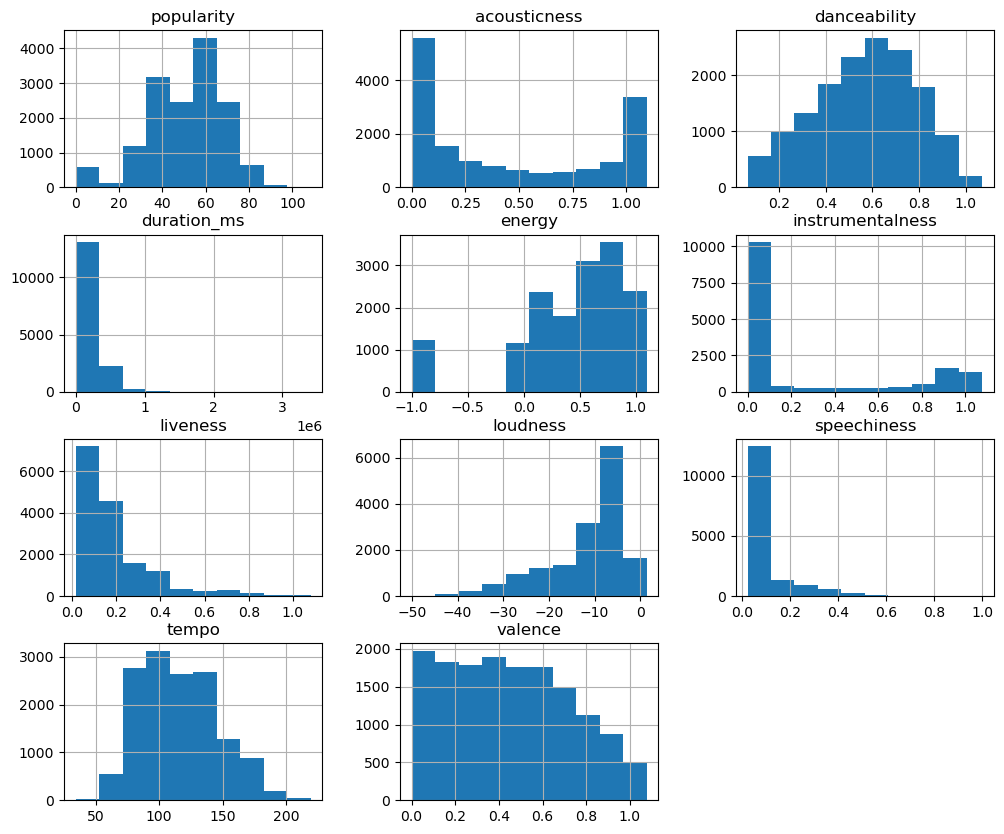

In [23]:
#Histogram
freq=train.select_dtypes(include=['float'])           # here mean is affected by extreme values thus we              
freq.hist(figsize=(12,10))                            #use median which is not affected by extreme values
plt.show()

- liveness has almost exponential distribution.
- It can be told that danceability follows normal distribution.
- no other column follows normal distribution.
- Here, if distribution is not normal then,mean is affected by extreme values, thus in those cases we use median which is not affected by extreme values


# Missing value Handling

In [24]:
train.isna().sum()

instance_id             0
track_name              0
popularity            642
acousticness            0
danceability          556
duration_ms            94
energy                 94
instrumentalness       95
key                     0
liveness                0
loudness               36
voice_gender          765
mode                   35
speechiness            26
tempo                1476
musician_category    1360
valence               677
music_genre             0
dtype: int64

In [25]:
for i in freq:
    train[i]= train[i].fillna(train[i].median())
    print(i)

popularity
acousticness
danceability
duration_ms
energy
instrumentalness
liveness
loudness
speechiness
tempo
valence


In [26]:
train.isna().sum()

instance_id             0
track_name              0
popularity              0
acousticness            0
danceability            0
duration_ms             0
energy                  0
instrumentalness        0
key                     0
liveness                0
loudness                0
voice_gender          765
mode                   35
speechiness             0
tempo                   0
musician_category    1360
valence                 0
music_genre             0
dtype: int64

In [27]:
train['voice_gender'].mode()

0    Female
Name: voice_gender, dtype: object

In [28]:
#filling missing values in col 'Embarked' with mode since its categorical
train['voice_gender']=train['voice_gender'].fillna(train['voice_gender'].mode()[0])

In [29]:
train['mode'].mode()

0    Major
Name: mode, dtype: object

In [30]:
#filling missing values in col 'Embarked' with mode since its categorical
# train['mode']=train['mode'].fillna(train['mode'].mode()[0])

In [31]:
# Replace NaN values with the mode of the 'mode' column
mode = train['mode'].mode()[0]
train['mode'] = train['mode'].fillna(mode)

In [32]:
train['mode'] = train['mode'].str.replace('NaN','Major')

In [33]:
train.nunique()

instance_id          15681
track_name           14799
popularity           12743
acousticness         15681
danceability         15125
duration_ms          14011
energy               14371
instrumentalness     11220
key                     12
liveness             15681
loudness             10473
voice_gender             3
mode                     2
speechiness          15655
tempo                12331
musician_category        3
valence              15005
music_genre              7
dtype: int64

In [34]:
train['musician_category'].mode()

0    Band
Name: musician_category, dtype: object

In [35]:
#filling missing values in col 'Embarked' with mode since its categorical
train['musician_category']=train['musician_category'].fillna(train['musician_category'].mode()[0])

In [36]:
train.isna().sum()

instance_id          0
track_name           0
popularity           0
acousticness         0
danceability         0
duration_ms          0
energy               0
instrumentalness     0
key                  0
liveness             0
loudness             0
voice_gender         0
mode                 0
speechiness          0
tempo                0
musician_category    0
valence              0
music_genre          0
dtype: int64

<AxesSubplot:>

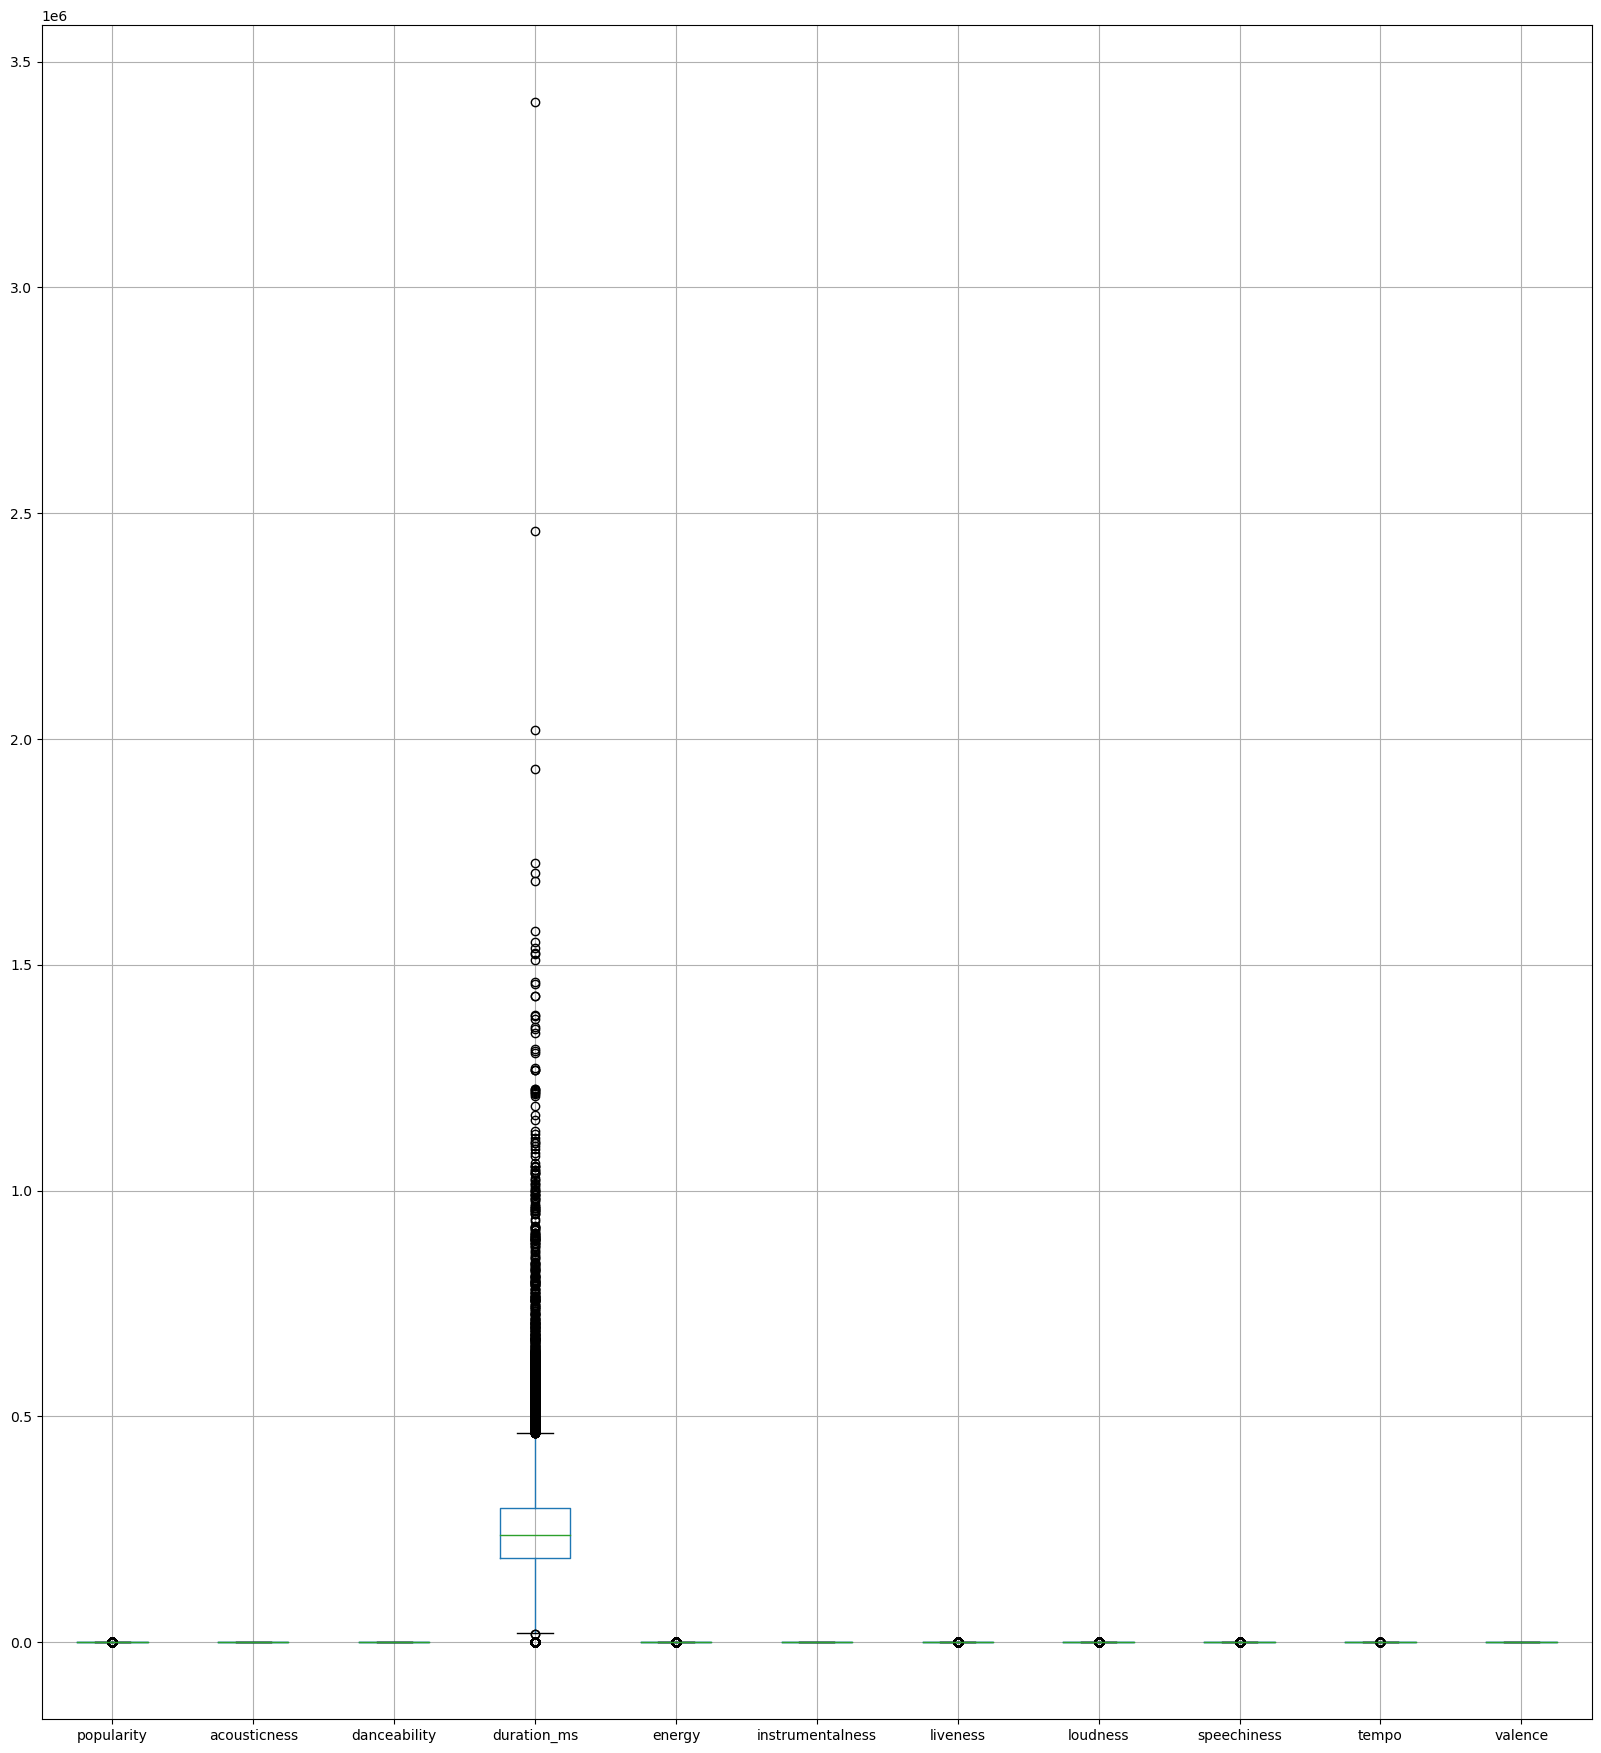

In [37]:
#Outlier detection
train.boxplot(figsize=(20,22))

- No major Outliers to be removed

In [38]:
#Check if any duplicate rows in dataset
train.duplicated().sum()

0

# Exploratory Data Analysis

In [39]:
train['music_genre'].value_counts()

Classical     3990
Rock          3879
Rap           3207
Jazz          2850
Country        683
Electronic     614
Hip-Hop        458
Name: music_genre, dtype: int64

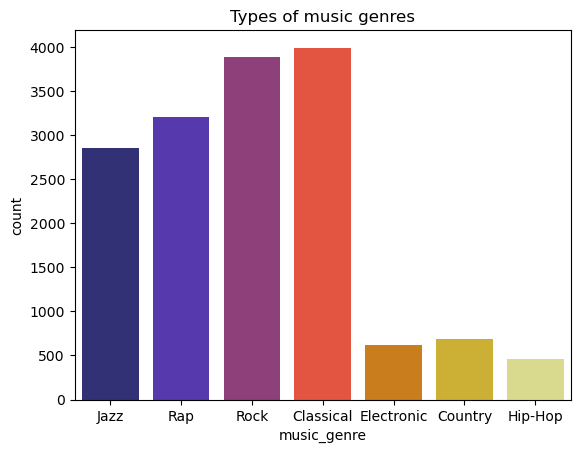

In [40]:
sns.countplot(x='music_genre',data=train, palette='CMRmap')
plt.title("Types of music genres")
plt.show()                                       #data is somewhat unbalanced

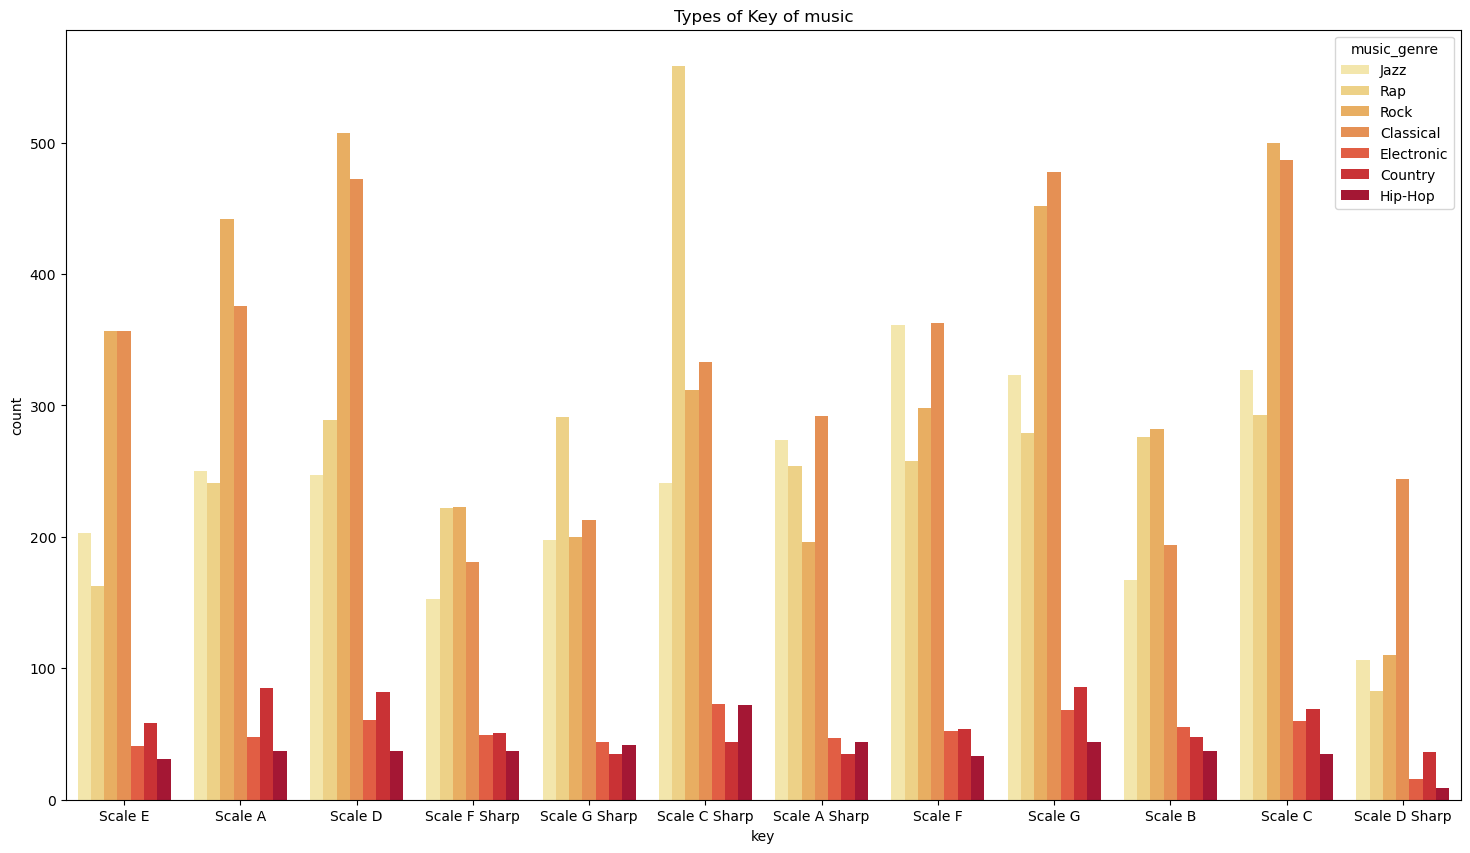

In [41]:
plt.figure(figsize=(18,10))
plt.title("Types of Key of music")
sns.countplot(x="key",hue="music_genre",data=train, palette='YlOrRd')
plt.show()

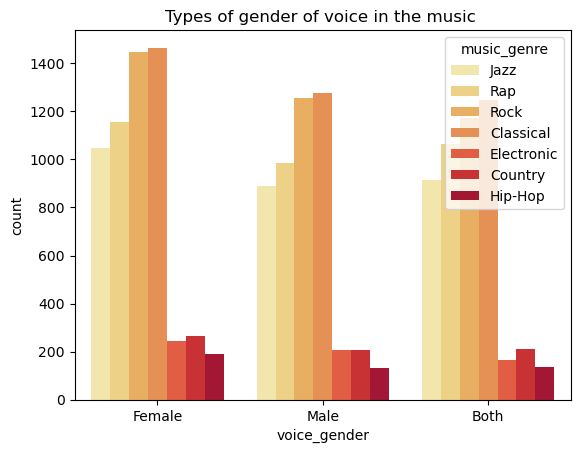

In [42]:
plt.title("Types of gender of voice in the music ")
sns.countplot(x="voice_gender",hue="music_genre",data=train, palette='YlOrRd')
plt.show()

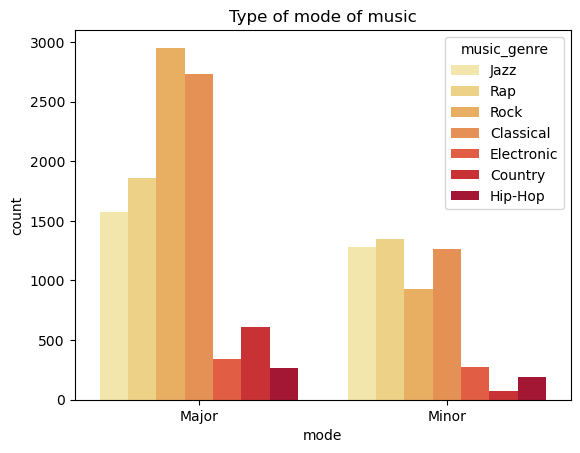

In [43]:
plt.title("Type of mode of music")
sns.countplot(x="mode",hue="music_genre",data=train, palette='YlOrRd')
plt.show()

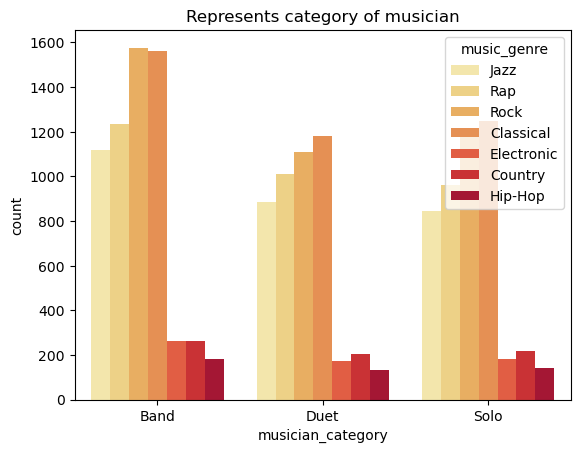

In [44]:
plt.title("Represents category of musician")
sns.countplot(x="musician_category",hue="music_genre",data=train, palette='YlOrRd')
plt.show()

In [45]:
train.head()

,instance_id,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,voice_gender,mode,speechiness,tempo,musician_category,valence,music_genre
0,MSC_83537.0,Estrellitas y Duendes,49.178,0.970522,0.580508,214625.776,0.192107,0.000000,Scale E,0.147134,-14.140,Female,Major,0.046404,143.788,Band,0.598965,Jazz
1,MSC_22044.0,Al Norte,59.827,1.009380,0.687542,216232.195,0.265942,0.000031,Scale A,0.174655,-13.716,Male,Major,0.039949,113.108,Band,0.357194,Jazz
2,MSC_62017.0,Yeah! (feat. Lil Jon & Ludacris),89.023,0.020041,0.967948,273314.723,0.857411,0.000000,Scale D,0.042030,-4.995,Female,Major,0.119917,105.018,Band,0.635525,Rap
3,MSC_76365.0,Can’t You See,55.762,0.010284,0.616287,189189.605,0.970513,0.000220,Scale D,0.124637,-4.262,Both,Major,0.167493,113.108,Duet,0.983750,Rock
4,MSC_71493.0,"Sonata III (G Moll), BWV 1029: Adagio",45.095,0.858769,0.280645,410136.987,0.114732,0.002753,Scale F Sharp,0.134782,-26.922,Female,Minor,0.039139,112.183,Band,0.074412,Classical


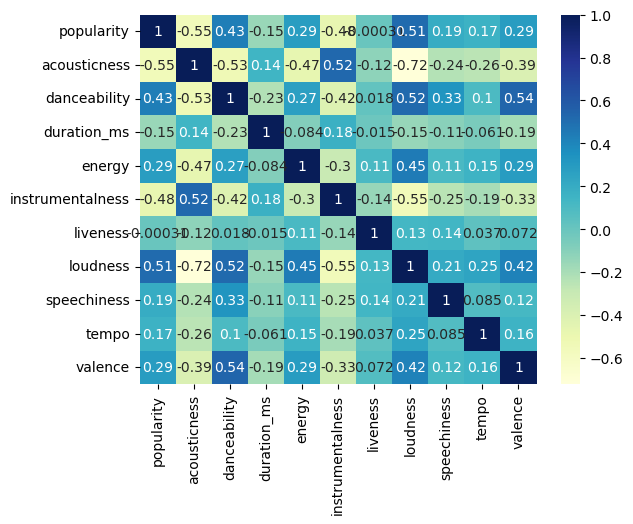

In [46]:
#CORRELATION MATRIX
corr=train.corr()
sns.heatmap(corr,annot=True,cmap='YlGnBu')
plt.show()

In [47]:
train.drop(['instance_id','track_name'],axis=1,inplace=True)

### Doing all the preprocessing steps on Test data too

In [48]:

# Replace question marks only in the 'mode 'and 'tempo'  columns
test[['mode', 'tempo']] = test[['mode', 'tempo']].replace('?', 'NaN')
test['tempo']=test['tempo'].astype(float) 

freq=test.select_dtypes(include=['float'])  
for i in freq:
    test[i]= test[i].fillna(test[i].median())
    
#filling missing values in col 'Embarked' with mode since its categorical
test['voice_gender']=test['voice_gender'].fillna(test['voice_gender'].mode()[0])

# Replace NaN values with the mode of the 'mode' column
mode = test['mode'].mode()[0]
test['mode'] = test['mode'].fillna(mode)

print(test['mode'].mode())
test['mode'] = test['mode'].str.replace('NaN','Major')
#filling missing values in col 'Embarked' with mode since its categorical
test['musician_category']=test['musician_category'].fillna(test['musician_category'].mode()[0])

test.drop(['instance_id','track_name'],axis=1,inplace=True)


0    Major
Name: mode, dtype: object


In [49]:
test.isna().sum()

popularity           0
acousticness         0
danceability         0
duration_ms          0
energy               0
instrumentalness     0
key                  0
liveness             0
loudness             0
voice_gender         0
mode                 0
speechiness          0
tempo                0
musician_category    0
valence              0
dtype: int64

In [50]:
test.nunique()

popularity           3504
acousticness         3921
danceability         3783
duration_ms          3527
energy               3592
instrumentalness     2856
key                    12
liveness             3921
loudness             3297
voice_gender            3
mode                    2
speechiness          3915
tempo                3401
musician_category       3
valence              3731
dtype: int64

In [51]:
test.dtypes

popularity           float64
acousticness         float64
danceability         float64
duration_ms          float64
energy               float64
instrumentalness     float64
key                   object
liveness             float64
loudness             float64
voice_gender          object
mode                  object
speechiness          float64
tempo                float64
musician_category     object
valence              float64
dtype: object

In [52]:
# #Label Encoding
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# train['key'] = le.fit_transform(train['key'])
# train['voice_gender'] = le.fit_transform(train['voice_gender'])
# train['mode'] = le.fit_transform(train['mode'])
# train['musician_category'] = le.fit_transform(train['musician_category'])

In [53]:
# #Label Encoding
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# test['key'] = le.fit_transform(test['key'])
# test['voice_gender'] = le.fit_transform(test['voice_gender'])
# test['mode'] = le.fit_transform(test['mode'])
# test['musician_category'] = le.fit_transform(test['musician_category'])

## X-Y Split

In [54]:
X=train.drop('music_genre',axis=1)
y=train['music_genre']
y.value_counts(normalize=True)       # if data is unbalanced upto 95=5 or 90-10 then use stratify

Classical     0.254448
Rock          0.247369
Rap           0.204515
Jazz          0.181749
Country       0.043556
Electronic    0.039156
Hip-Hop       0.029207
Name: music_genre, dtype: float64

## ENCODING

In [55]:
#One-hot encoding along with dropping first cols to avoid multicollinearity
x=pd.get_dummies(X,drop_first=True)

In [56]:
x.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,...,key_Scale E,key_Scale F,key_Scale F Sharp,key_Scale G,key_Scale G Sharp,voice_gender_Female,voice_gender_Male,mode_Minor,musician_category_Duet,musician_category_Solo
0,49.178,0.970522,0.580508,214625.776,0.192107,0.000000,0.147134,-14.140,0.046404,143.788,...,1,0,0,0,0,1,0,0,0,0
1,59.827,1.009380,0.687542,216232.195,0.265942,0.000031,0.174655,-13.716,0.039949,113.108,...,0,0,0,0,0,0,1,0,0,0
2,89.023,0.020041,0.967948,273314.723,0.857411,0.000000,0.042030,-4.995,0.119917,105.018,...,0,0,0,0,0,1,0,0,0,0
3,55.762,0.010284,0.616287,189189.605,0.970513,0.000220,0.124637,-4.262,0.167493,113.108,...,0,0,0,0,0,0,0,0,1,0
4,45.095,0.858769,0.280645,410136.987,0.114732,0.002753,0.134782,-26.922,0.039139,112.183,...,0,0,1,0,0,1,0,1,0,0


In [57]:
# Perform 80 : 20 Train-Test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state=123,stratify=y)

In [58]:
# Observe the shapes
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((11760, 27), (11760,), (3921, 27), (3921,))

# Model Building and Evaluation

## 1. Logistic Regression

In [59]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr_model=lr.fit(x_train,y_train)
y_pred=lr_model.predict(x_test)
y_pred

array(['Rock', 'Rock', 'Classical', ..., 'Jazz', 'Rock', 'Rock'],
      dtype=object)

In [60]:
from sklearn.metrics import confusion_matrix , accuracy_score, precision_score, recall_score, f1_score,classification_report

print('Accuracy is: ',accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy is:  0.45626115786789084
              precision    recall  f1-score   support

   Classical       0.57      0.84      0.68       998
     Country       0.00      0.00      0.00       171
  Electronic       0.00      0.00      0.00       153
     Hip-Hop       0.00      0.00      0.00       114
        Jazz       0.40      0.09      0.14       713
         Rap       0.00      0.00      0.00       802
        Rock       0.39      0.92      0.54       970

    accuracy                           0.46      3921
   macro avg       0.19      0.26      0.20      3921
weighted avg       0.31      0.46      0.33      3921



In [61]:
confusion_matrix(y_test,y_pred)

array([[839,   0,   4,   0,  21,   0, 134],
       [ 65,   0,   0,   0,   7,   0,  99],
       [104,   0,   0,   0,   6,   0,  43],
       [  3,   0,   0,   0,   6,   0, 105],
       [384,   0,   0,   0,  61,   0, 268],
       [ 20,   0,   0,   0,  19,   0, 763],
       [ 47,   0,   0,   0,  34,   0, 889]], dtype=int64)

In [62]:
import sklearn.metrics as metrics

In [63]:
score=100*(metrics.f1_score(y_test,y_pred,average='macro'))

In [64]:
score

19.519908426244317

## 2. KNN Classifier

In [65]:
from sklearn.neighbors import KNeighborsClassifier
lst_acc=[]
neighbors = np.arange(3,15,2)
for i in neighbors:    # 2 inside means takes values 5,7,9,.....
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    acc= accuracy_score(y_test, y_pred)
    lst_acc.append(acc)
lst_acc

[0.2996684519255292,
 0.3221117061973986,
 0.32619229788319304,
 0.33588370313695487,
 0.33384340729405765,
 0.34072940576383576]

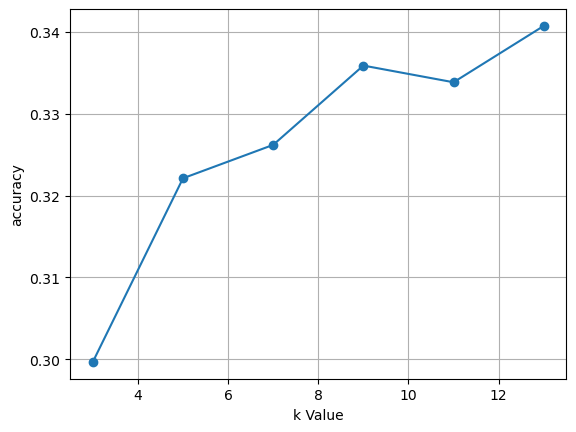

In [66]:
plt.plot(neighbors,lst_acc,'o-')
plt.xlabel('k Value')
plt.ylabel('accuracy')
plt.grid()
plt.show()

In [67]:
knn=KNeighborsClassifier(n_neighbors=9)
knn_model=knn.fit(x_train,y_train)
y_pred=knn_model.predict(x_test)

In [68]:
print('Accuracy is: ',accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy is:  0.33588370313695487
              precision    recall  f1-score   support

   Classical       0.43      0.58      0.49       998
     Country       0.07      0.02      0.03       171
  Electronic       0.07      0.02      0.03       153
     Hip-Hop       0.00      0.00      0.00       114
        Jazz       0.25      0.21      0.23       713
         Rap       0.31      0.33      0.32       802
        Rock       0.32      0.33      0.32       970

    accuracy                           0.34      3921
   macro avg       0.20      0.21      0.20      3921
weighted avg       0.30      0.34      0.31      3921



In [69]:
confusion_matrix(y_test,y_pred)

array([[578,  11,   7,   4, 152, 110, 136],
       [ 34,   3,   5,   1,  30,  43,  55],
       [ 59,   1,   3,   2,  30,  17,  41],
       [ 28,   1,   1,   0,  19,  32,  33],
       [286,   8,   9,   1, 150, 102, 157],
       [160,   8,  11,   3,  93, 263, 264],
       [211,  14,   9,   5, 136, 275, 320]], dtype=int64)

In [70]:
score=100*(metrics.f1_score(y_test,y_pred,average='macro'))
score

20.280388026027474

## 3. Desicion tree Classifier

In [71]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt_model=dt.fit(x_train,y_train)
y_pred=dt_model.predict(x_test)

In [72]:
print('Accuracy is: ',accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy is:  0.6602907421576129
              precision    recall  f1-score   support

   Classical       0.85      0.85      0.85       998
     Country       0.35      0.36      0.35       171
  Electronic       0.41      0.41      0.41       153
     Hip-Hop       0.08      0.11      0.09       114
        Jazz       0.58      0.60      0.59       713
         Rap       0.66      0.63      0.65       802
        Rock       0.71      0.69      0.70       970

    accuracy                           0.66      3921
   macro avg       0.52      0.52      0.52      3921
weighted avg       0.67      0.66      0.66      3921



In [73]:
confusion_matrix(y_test,y_pred)

array([[853,   7,  11,   0, 111,   2,  14],
       [  7,  61,   9,   5,  33,   8,  48],
       [ 12,   3,  62,   0,  60,  10,   6],
       [  0,   2,   2,  12,   5,  79,  14],
       [107,  39,  52,  13, 425,  21,  56],
       [  6,  14,   6, 106,  27, 505, 138],
       [ 17,  47,  11,  20,  69, 135, 671]], dtype=int64)

In [74]:
score=100*(metrics.f1_score(y_test,y_pred,average='macro'))
score

51.96397825647937

## 4. Random Forest

In [75]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf_model=rf.fit(x_train,y_train)
y_pred=rf_model.predict(x_test)

In [76]:
print('Accuracy is: ',accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy is:  0.7806681968885488
              precision    recall  f1-score   support

   Classical       0.90      0.92      0.91       998
     Country       0.80      0.39      0.52       171
  Electronic       0.70      0.29      0.41       153
     Hip-Hop       0.00      0.00      0.00       114
        Jazz       0.70      0.74      0.72       713
         Rap       0.76      0.81      0.78       802
        Rock       0.75      0.88      0.81       970

    accuracy                           0.78      3921
   macro avg       0.66      0.58      0.59      3921
weighted avg       0.76      0.78      0.76      3921



In [77]:
confusion_matrix(y_test,y_pred)

array([[921,   4,   5,   0,  55,   0,  13],
       [  0,  66,   2,   0,  42,   5,  56],
       [ 10,   1,  44,   0,  78,  10,  10],
       [  0,   0,   1,   0,   4, 101,   8],
       [ 91,   5,   8,   0, 528,  18,  63],
       [  0,   1,   3,   6,  12, 652, 128],
       [  4,   6,   0,   0,  33,  77, 850]], dtype=int64)

In [78]:
score=100*(metrics.f1_score(y_test,y_pred,average='macro'))
score

59.30670447877823

## 5.Cat Boost Classifier

In [79]:
import catboost as ctb
 # fit a CART model to the data
parameters = {'depth'         : [6,8,10],
                  'learning_rate' : [0.01, 0.05, 0.1],
                  'iterations'    : [30, 50, 100]
                 }
model = ctb.CatBoostClassifier(silent=True)
model.fit(x_train, y_train)
# make predictions
y_pred = model.predict(x_test)

In [80]:
print('Accuracy is: ',accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy is:  0.7870441213976026
              precision    recall  f1-score   support

   Classical       0.91      0.92      0.91       998
     Country       0.72      0.47      0.57       171
  Electronic       0.61      0.39      0.47       153
     Hip-Hop       0.11      0.01      0.02       114
        Jazz       0.74      0.75      0.75       713
         Rap       0.75      0.82      0.78       802
        Rock       0.77      0.86      0.81       970

    accuracy                           0.79      3921
   macro avg       0.66      0.60      0.62      3921
weighted avg       0.77      0.79      0.77      3921



In [81]:
confusion_matrix(y_test,y_pred)

array([[916,   4,  10,   0,  56,   0,  12],
       [  1,  81,   2,   1,  26,   4,  56],
       [ 14,   1,  59,   0,  61,  10,   8],
       [  0,   1,   1,   1,   3, 104,   4],
       [ 73,  14,  22,   1, 536,  19,  48],
       [  1,   0,   3,   6,  10, 657, 125],
       [  7,  11,   0,   0,  32,  84, 836]], dtype=int64)

In [82]:
score=100*(metrics.f1_score(y_test,y_pred,average='macro'))
score

61.60467512077522

## 6. Gradient Boosting Classifier

In [83]:
from sklearn.ensemble import GradientBoostingClassifier
# Define the gradient boosting classifier model
gb_clf = GradientBoostingClassifier(random_state=42)

# Train the model on the training data
gb_clf.fit(x_train, y_train)

# Evaluate the model on the testing data
accuracy = gb_clf.score(x_test, y_test)
print(f"Accuracy on testing data: {accuracy}")

Accuracy on testing data: 0.7788829380260138


In [84]:
score=100*(metrics.f1_score(y_test,y_pred,average='macro'))
score

61.60467512077522

### Cat Boost Classifier has the highest score thus we take it as the best model

In [85]:
test.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,voice_gender,mode,speechiness,tempo,musician_category,valence
0,26.101,0.823765,0.115490,211462.287,0.125325,0.945272,Scale A Sharp,0.120392,-25.541,Both,Minor,0.038657,80.777,Duet,0.041238
1,66.325,0.015441,0.592838,249151.238,0.870798,0.000108,Scale E,0.406722,-3.905,Male,Major,0.051368,76.004,Band,0.456309
2,71.871,0.001006,0.510340,215693.240,0.683077,0.000000,Scale C,0.084608,-6.825,Female,Major,0.034303,144.458,Solo,0.193332
3,56.151,0.315650,0.338336,307056.179,0.608904,0.000000,Scale A,0.276811,-8.382,Female,Minor,0.036934,118.145,Solo,0.214906
4,43.687,0.038336,0.773904,352802.872,0.955500,0.000007,Scale D,0.301726,-4.733,Both,Major,0.079688,95.012,Duet,0.757347


In [86]:
#One-hot encoding on test dataset before predicting along with dropping first cols to avoid multicollinearity
Test =pd.get_dummies(test,drop_first=True)

In [87]:
Test.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,...,key_Scale E,key_Scale F,key_Scale F Sharp,key_Scale G,key_Scale G Sharp,voice_gender_Female,voice_gender_Male,mode_Minor,musician_category_Duet,musician_category_Solo
0,26.101,0.823765,0.115490,211462.287,0.125325,0.945272,0.120392,-25.541,0.038657,80.777,...,0,0,0,0,0,0,0,1,1,0
1,66.325,0.015441,0.592838,249151.238,0.870798,0.000108,0.406722,-3.905,0.051368,76.004,...,1,0,0,0,0,0,1,0,0,0
2,71.871,0.001006,0.510340,215693.240,0.683077,0.000000,0.084608,-6.825,0.034303,144.458,...,0,0,0,0,0,1,0,0,0,1
3,56.151,0.315650,0.338336,307056.179,0.608904,0.000000,0.276811,-8.382,0.036934,118.145,...,0,0,0,0,0,1,0,1,0,1
4,43.687,0.038336,0.773904,352802.872,0.955500,0.000007,0.301726,-4.733,0.079688,95.012,...,0,0,0,0,0,0,0,0,1,0


## Hyperparameter Tuning

In [88]:
###Random Search CV

# Number of trees in random forest
n_estimators = [10,20,60,100,120]

# Number of features to consider at every split
max_features = [0.2,0.6,1.0]

# Maximum number of levels in tree
max_depth = [2,8,None]

# Number of samples
max_samples = [0.5,0.75,1.0]

# Bootstrap samples
bootstrap = [True,False]

# Minimum number of samples required to split a node
min_samples_split = [2, 5]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]

# Number of trees in random forest
n_estimators = [10,20,60,100,120]

# Number of features to consider at every split
max_features = [0.2,0.6,1.0]

# Maximum number of levels in tree
max_depth = [2,8,None]

# Number of samples
max_samples = [0.5,0.75,1.0]

# Bootstrap samples
bootstrap = [True,False]

# Minimum number of samples required to split a node
min_samples_split = [2, 5]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]


In [89]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
              'max_samples':max_samples,
              'bootstrap':bootstrap,
              'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf
             }
print(param_grid)

{'n_estimators': [10, 20, 60, 100, 120], 'max_features': [0.2, 0.6, 1.0], 'max_depth': [2, 8, None], 'max_samples': [0.5, 0.75, 1.0], 'bootstrap': [True, False], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2]}


In [90]:
# from sklearn.model_selection import RandomizedSearchCV
# ctb_grid = RandomizedSearchCV(estimator = ctb, 
#                        param_distributions = param_grid, 
#                        cv = 5, 
#                        verbose=2, 
#                        n_jobs = -1)
# ctb_grid.fit(x_train,y_train)

# print(ctb_grid.best_params_)
# print(ctb_grid.best_score_)

In [ ]:
# y_pred=ctb_grid.predict(x_test)
# print(classification_report(y_test,y_pred))

In [ ]:
# score=100*(metrics.f1_score(y_test,y_pred,average='macro'))
# score

## Predictions

In [92]:
test_pred = model.predict(Test)
test_pred

array([['Classical'],
       ['Rock'],
       ['Rock'],
       ...,
       ['Classical'],
       ['Country'],
       ['Electronic']], dtype=object)

In [93]:
test_pred=test_pred.reshape(-1,1)
test_pred

array([['Classical'],
       ['Rock'],
       ['Rock'],
       ...,
       ['Classical'],
       ['Country'],
       ['Electronic']], dtype=object)

In [94]:
import numpy
music_genre = list(numpy.concatenate(test_pred).flat)
music_genre

['Classical',
 'Rock',
 'Rock',
 'Rock',
 'Jazz',
 'Rap',
 'Electronic',
 'Rap',
 'Rock',
 'Rock',
 'Rock',
 'Jazz',
 'Rap',
 'Rock',
 'Rock',
 'Classical',
 'Jazz',
 'Classical',
 'Rap',
 'Rap',
 'Rap',
 'Jazz',
 'Classical',
 'Rap',
 'Classical',
 'Rap',
 'Rock',
 'Jazz',
 'Jazz',
 'Jazz',
 'Rock',
 'Rock',
 'Rap',
 'Rock',
 'Classical',
 'Jazz',
 'Classical',
 'Rock',
 'Rock',
 'Rock',
 'Jazz',
 'Rap',
 'Rap',
 'Classical',
 'Classical',
 'Rock',
 'Jazz',
 'Jazz',
 'Classical',
 'Classical',
 'Rock',
 'Rock',
 'Classical',
 'Classical',
 'Rock',
 'Rap',
 'Rock',
 'Jazz',
 'Rock',
 'Jazz',
 'Rock',
 'Rock',
 'Rap',
 'Classical',
 'Classical',
 'Jazz',
 'Classical',
 'Jazz',
 'Rock',
 'Rap',
 'Rock',
 'Rap',
 'Classical',
 'Jazz',
 'Classical',
 'Classical',
 'Classical',
 'Rap',
 'Rock',
 'Rock',
 'Rock',
 'Rap',
 'Jazz',
 'Classical',
 'Rock',
 'Jazz',
 'Rock',
 'Country',
 'Rock',
 'Rap',
 'Classical',
 'Jazz',
 'Classical',
 'Rap',
 'Classical',
 'Classical',
 'Classical',
 'Rock'

In [95]:
tests = pd.read_csv('C:/Users/Mohan/Downloads/dataset/test.csv')

In [96]:
music_id= tests['instance_id']
music_id

0       MSC_70753.0
1       MSC_24064.0
2       MSC_22731.0
3       MSC_32095.0
4       MSC_24198.0
           ...     
3916    MSC_80955.0
3917    MSC_72767.0
3918    MSC_40192.0
3919    MSC_56067.0
3920    MSC_90169.0
Name: instance_id, Length: 3921, dtype: object

In [97]:
music_id=tests['instance_id'].values.reshape(-1,1)
music_id

array([['MSC_70753.0'],
       ['MSC_24064.0'],
       ['MSC_22731.0'],
       ...,
       ['MSC_40192.0'],
       ['MSC_56067.0'],
       ['MSC_90169.0']], dtype=object)

In [98]:
instance_id = list(numpy.concatenate(music_id).flat)
instance_id 

['MSC_70753.0',
 'MSC_24064.0',
 'MSC_22731.0',
 'MSC_32095.0',
 'MSC_24198.0',
 'MSC_69624.0',
 'MSC_33498.0',
 'MSC_87791.0',
 'MSC_70849.0',
 'MSC_63394.0',
 'MSC_60355.0',
 'MSC_21923.0',
 'MSC_58064.0',
 'MSC_88317.0',
 'MSC_41479.0',
 'MSC_45508.0',
 'MSC_64271.0',
 'MSC_63671.0',
 'MSC_86129.0',
 'MSC_69485.0',
 'MSC_34453.0',
 'MSC_85190.0',
 'MSC_75862.0',
 'MSC_69933.0',
 'MSC_60559.0',
 'MSC_49214.0',
 'MSC_85991.0',
 'MSC_27341.0',
 'MSC_75435.0',
 'MSC_72925.0',
 'MSC_88652.0',
 'MSC_43190.0',
 'MSC_28066.0',
 'MSC_76421.0',
 'MSC_43378.0',
 'MSC_70119.0',
 'MSC_71881.0',
 'MSC_86399.0',
 'MSC_74001.0',
 'MSC_32338.0',
 'MSC_43610.0',
 'MSC_20556.0',
 'MSC_82323.0',
 'MSC_75764.0',
 'MSC_77970.0',
 'MSC_56719.0',
 'MSC_28746.0',
 'MSC_73146.0',
 'MSC_49841.0',
 'MSC_43731.0',
 'MSC_62683.0',
 'MSC_74192.0',
 'MSC_75012.0',
 'MSC_76686.0',
 'MSC_74295.0',
 'MSC_67127.0',
 'MSC_35864.0',
 'MSC_61965.0',
 'MSC_65716.0',
 'MSC_67368.0',
 'MSC_54504.0',
 'MSC_26178.0',
 'MSC_65

In [99]:
ss = pd.DataFrame({"instance_id": instance_id , "music_genre": music_genre})
ss

,instance_id,music_genre
0,MSC_70753.0,Classical
1,MSC_24064.0,Rock
2,MSC_22731.0,Rock
3,MSC_32095.0,Rock
4,MSC_24198.0,Jazz
...,...,...
3916,MSC_80955.0,Classical
3917,MSC_72767.0,Rock
3918,MSC_40192.0,Classical
3919,MSC_56067.0,Country


In [100]:
ss.to_csv('exit_exam.csv',index = False)
ss.head()

,instance_id,music_genre
0,MSC_70753.0,Classical
1,MSC_24064.0,Rock
2,MSC_22731.0,Rock
3,MSC_32095.0,Rock
4,MSC_24198.0,Jazz
